In [3]:
%matplotlib inline

In [1]:
import numpy
import math
from skimage.io import imread
from skimage import img_as_float
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image = imread('parrots.jpg')
# Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage.
image_float = img_as_float(image)
#print(image_float)

# 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
r = image_float[:, :, 0].ravel()
g = image_float[:, :, 1].ravel()
b = image_float[:, :, 2].ravel()
rgb = numpy.transpose(numpy.vstack((r, g, b)))



[[0.05406873 0.11689859 0.05043304]
 [0.78781572 0.82326519 0.79806684]
 [0.95428402 0.82764685 0.04104736]
 [0.45229632 0.66630376 0.4414601 ]
 [0.09575687 0.63581725 0.06700343]
 [0.61272096 0.2144786  0.06336291]
 [0.77703693 0.09103536 0.69019608]
 [0.04568045 0.55170208 0.59895701]]
[0.05406873240567861, 0.11689858861199748, 0.05043303821156503]
[0.7878157183226635, 0.8232651929626548, 0.7980668380985702]
[0.9542840193953388, 0.8276468464204844, 0.041047359828998264]
[0.4522963231246552, 0.6663037642630064, 0.44146010052385476]
[0.09575687227604274, 0.6358172468686907, 0.06700343003932496]
[0.6127209588175379, 0.21447860103210797, 0.06336290867467514]
[0.777036931066869, 0.09103536174588372, 0.6901960784313999]
[0.04568045039786223, 0.5517020755784164, 0.5989570056750719]


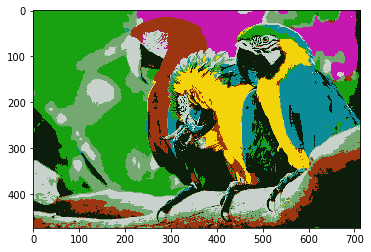

In [3]:
# 3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241.
kM = KMeans(init='k-means++', random_state=241)
kM.fit(rgb)
cl = kM.labels_

# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами:
# медианным и средним цветом по кластеру.
colors_avg = kM.cluster_centers_
#print(colors_avg)

cl_img = numpy.reshape(cl, (-1, 713))
img_new = numpy.copy(image_float)
for cluster in range(0, kM.n_clusters):
    #mean_r = numpy.median(img_new[:, :, 0][cl_img == cluster])
    #mean_g = numpy.median(img_new[:, :, 1][cl_img == cluster])
    #mean_b = numpy.median(img_new[:, :, 2][cl_img == cluster])
    # print [mean_r, mean_g, mean_b]

    img_new[cl_img == cluster] = colors_avg[cluster]
    plt.imshow(img_new)

img_new_1 = numpy.copy(image_float)
for cluster in range(0, kM.n_clusters):
    median_r = numpy.median(img_new[:, :, 0][cl_img == cluster])
    median_g = numpy.median(img_new[:, :, 1][cl_img == cluster])
    median_b = numpy.median(img_new[:, :, 2][cl_img == cluster])
    print([median_r, median_g, median_b])

    img_new_1[cl_img == cluster] = [median_r, median_g, median_b]
    plt.imshow(img_new_1)

In [4]:
# 3. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно
def PSNR(image1, image2):
    """Function calculates PSNR metrics between two images"""
    mse = numpy.mean((image1 - image2) ** 2)
    psnr = 10 * math.log10(numpy.max(image1) / mse)
    return psnr

print(PSNR(image_float, img_new))

18.436818720615747


1 9.818835544771291
2 12.080170305304357
3 13.153471212935688
4 14.36780769396911
5 15.527127647188173
6 16.543992608344684
7 17.640985921681644
8 18.436818720615747
9 19.112663136548214
10 19.640740487474282
11 20.127583570977684
12 20.592506619385627
13 21.021371526439076
14 21.296835210936745
15 21.607158950787174
16 21.863104281542537
17 22.11979778761737
18 22.335486977005615
19 22.522084161476307
20 22.699037351453267


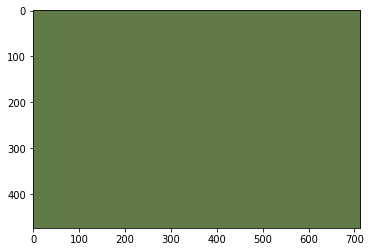

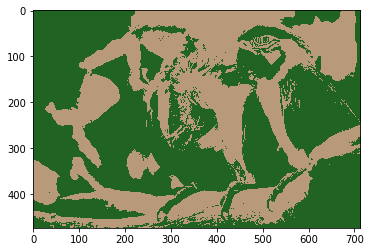

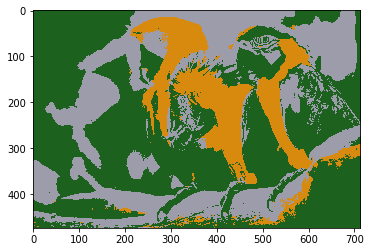

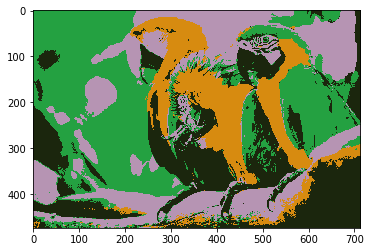

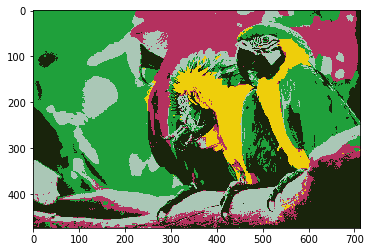

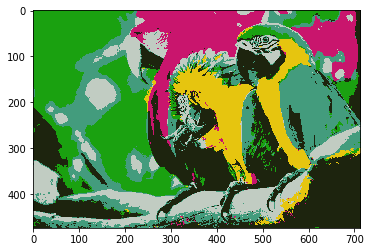

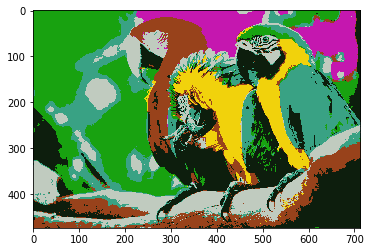

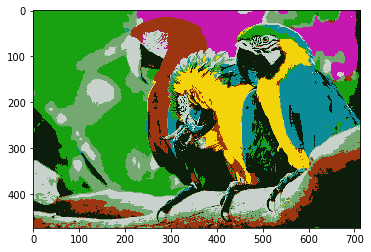

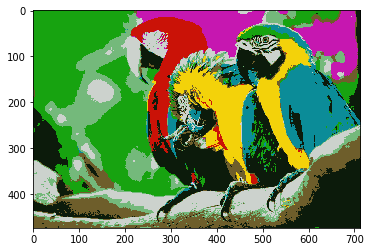

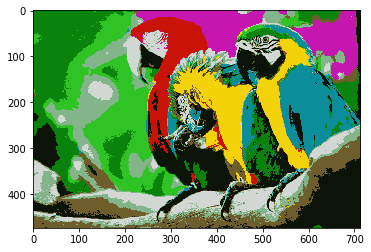

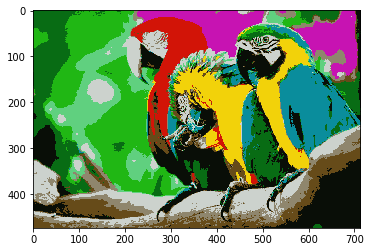

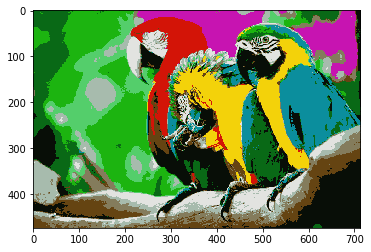

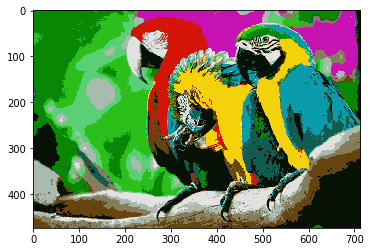

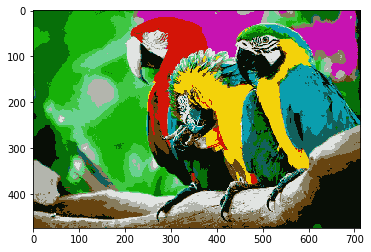

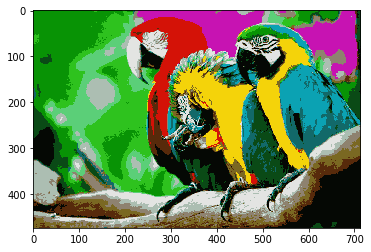

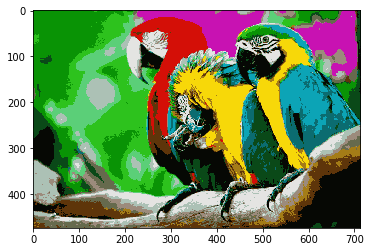

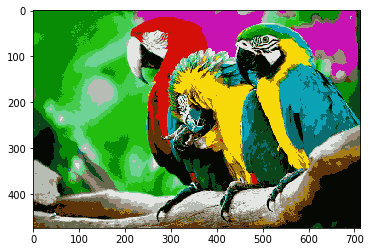

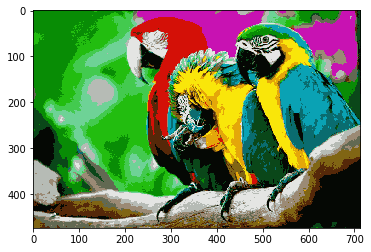

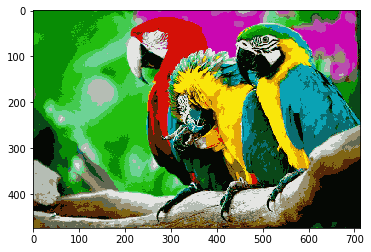

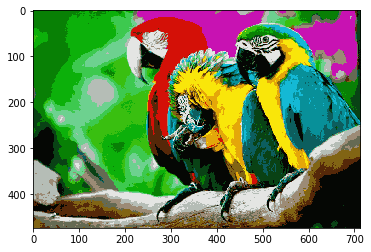

In [5]:
# 4. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более
# 20 кластеров). Это число и будет ответом в данной задаче.
for i in range(1, 21):
    kM = KMeans(n_clusters = i, init = 'k-means++', random_state = 241)
    kM.fit(rgb)
    cl = kM.labels_
    colors_avg = kM.cluster_centers_
    cl_img = numpy.reshape(cl, (-1, 713))
    img_new = numpy.copy(image_float)
    for cluster in range(0, i):
        img_new[cl_img == cluster] = colors_avg[cluster]
    print (i, PSNR(image_float, img_new))
    plt.figure()
    plt.imshow(img_new)